## Data Visualizations

In [27]:
import config
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df  = config.main()[1]

### Publications per year Counts and Growth rate

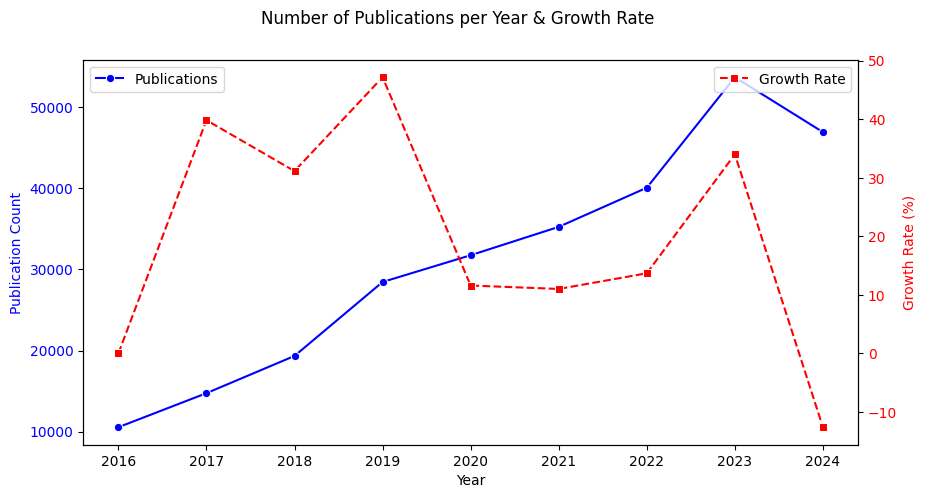

In [30]:
pub_counts = pd.DataFrame({"Year" : list(range(2016,2025)), "Count" : [10541,14740,19331,28451,31751, 35248, 40073,53702, 46933]})

# Calculate publication growth rate
pub_counts["Growth Rate(%)"] = pub_counts["Count"].pct_change() * 100
pub_counts["Growth Rate(%)"].fillna(0, inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Publication Count
sns.lineplot(data=pub_counts, x="Year", y="Count", marker="o", color="blue", ax=ax1, label="Publications")
ax1.set_ylabel("Publication Count", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
sns.lineplot(data=pub_counts, x="Year", y="Growth Rate(%)", marker="s", linestyle="dashed", color="red", ax=ax2, label="Growth Rate")
ax2.set_ylabel("Growth Rate (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

fig.suptitle("Number of Publications per Year & Growth Rate")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

### Average numberof authors per paper

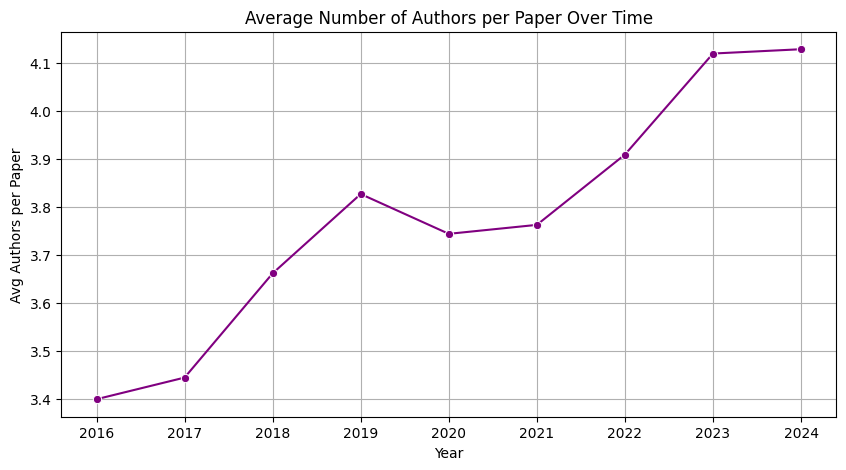

In [31]:
# Count authors per paper
df["Author Count"] = df["Authors"].apply(lambda x: len(x.split(";")))

# Group by year and get the average
avg_authors = df.groupby("Year")["Author Count"].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_authors.index, y=avg_authors.values, marker="o", color="purple")
plt.xlabel("Year")
plt.ylabel("Avg Authors per Paper")
plt.title("Average Number of Authors per Paper Over Time")
plt.grid()
plt.show()

### Share of Multi-author vs Single-author publications 

<Figure size 1200x600 with 0 Axes>

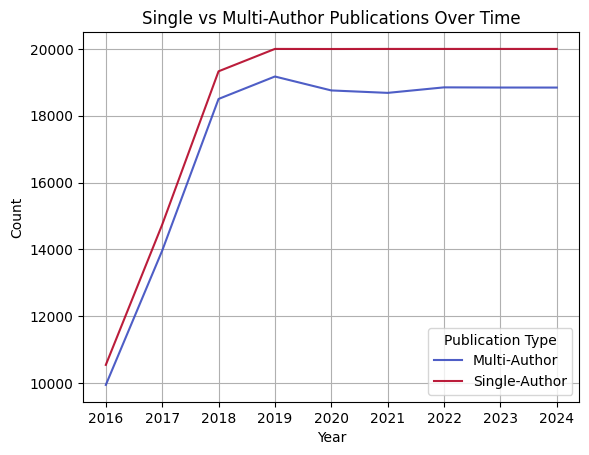

In [32]:
# Classify papers as single or multi-author
df["Single Author"] = df["Author Count"] == 1

# Count single vs. multi-author per year
author_type_counts = df.groupby("Year")["Single Author"].value_counts().unstack()

# Rename columns
author_type_counts.columns = ["Multi-Author", "Single-Author"]

# Plot
plt.figure(figsize=(12, 6))
author_type_counts.plot(kind="line", stacked=True, colormap="coolwarm", alpha=0.9)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Single vs Multi-Author Publications Over Time")
plt.legend(title="Publication Type")
plt.grid()
plt.show()

### Average number of publications per author globally

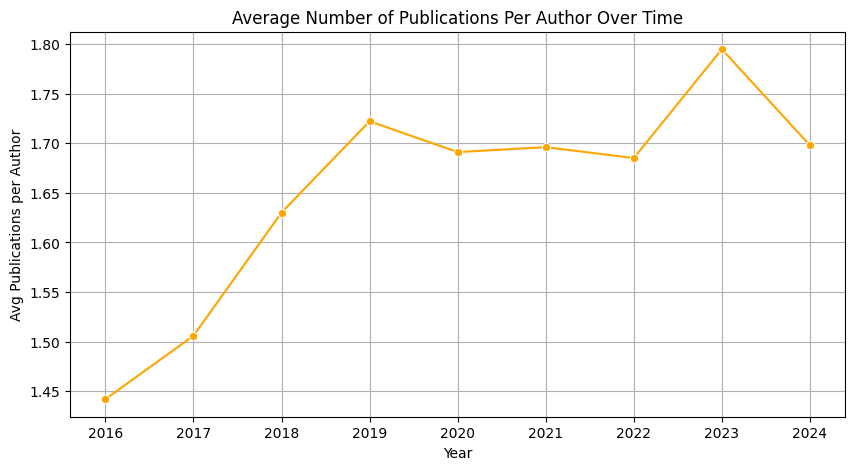

In [33]:
# Explode authors to assign each author their own row
df_exploded = df[["Year", "Authors"]].copy()
df_exploded["Author names"] = df_exploded["Authors"].str.split(";")
df_exploded = df_exploded.explode("Author names")

# Count unique publications per author per year
author_publications = df_exploded.groupby(["Year", "Author names"]).size().reset_index(name="Publications Count")

# Get the average publications per author per year
avg_pubs_per_author = author_publications.groupby("Year")["Publications Count"].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_pubs_per_author.index, y=avg_pubs_per_author.values, marker="o", color="orange")
plt.xlabel("Year")
plt.ylabel("Avg Publications per Author")
plt.title("Average Number of Publications Per Author Over Time")
plt.grid()
plt.show()


### Average number of keywords used per document

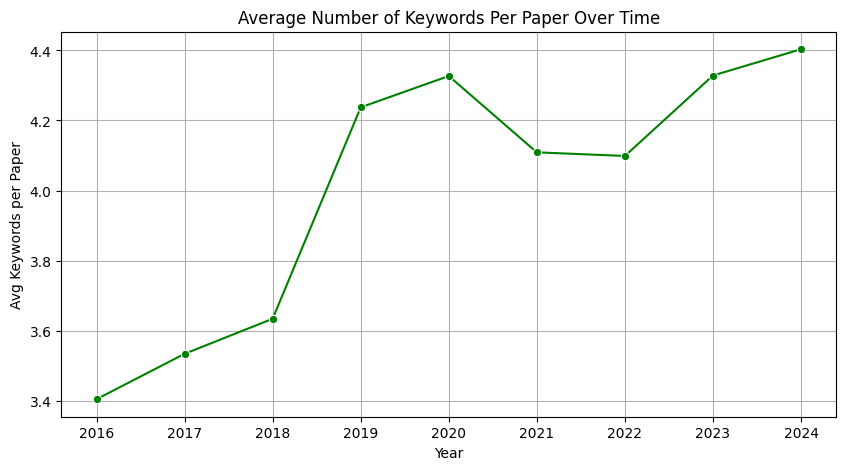

In [35]:
# Count number of keywords per paper
df["Keyword Count"] = df["Author Keywords"].apply(lambda x: len(x.split(";")))

# Group by year and compute average
avg_keywords = df.groupby("Year")["Keyword Count"].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_keywords.index, y=avg_keywords.values, marker="o", color="green")
plt.xlabel("Year")
plt.ylabel("Avg Keywords per Paper")
plt.title("Average Number of Keywords Per Paper Over Time")
plt.grid()
plt.show()